In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf
from feature_engineering import process_categorical_columns

## Ordinary Least Squares (All Variables)

In [2]:
df = pd.read_csv('StudentPerformanceFactorsCleaned.csv')
df = process_categorical_columns(df)
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities_Yes,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access_Yes,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type_Public,Peer_Influence,Physical_Activity,Learning_Disabilities_Yes,Parental_Education_Level,Gender_Male,Exam_Score
0,23,84,0,2,0,7,73,0,1,0,0,1,1,2,3,0,0,1,67
1,19,64,0,1,0,8,59,0,1,2,1,1,1,0,4,0,1,0,61
2,24,98,1,1,1,7,91,1,1,2,1,1,1,1,4,0,2,1,74
3,29,89,0,1,1,8,98,1,1,1,1,1,1,0,4,0,0,1,71
4,19,92,1,1,1,6,65,1,1,3,1,2,1,1,4,0,1,0,70


In [3]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [4]:
numeric_columns = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity']
scaler = StandardScaler()
X_train_numeric = df_train[numeric_columns]
X_train_numeric = scaler.fit_transform(X_train_numeric)
df_train[numeric_columns] = X_train_numeric

X_test_numeric = df_test[numeric_columns]
X_test_numeric = scaler.fit_transform(X_test_numeric)
df_test[numeric_columns] = X_test_numeric

In [5]:
lm = smf.ols(formula='Exam_Score ~ Hours_Studied + Attendance + C(Parental_Involvement) + C(Access_to_Resources) + C(Extracurricular_Activities_Yes) + Sleep_Hours + Previous_Scores + C(Motivation_Level) + C(Internet_Access_Yes) + Tutoring_Sessions + C(Family_Income) + C(Teacher_Quality) + C(School_Type_Public) + C(Peer_Influence) + Physical_Activity + C(Learning_Disabilities_Yes) + C(Parental_Education_Level) + C(Gender_Male)', data=df_train)
lm = lm.fit()

In [6]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Exam_Score   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     476.6
Date:                Tue, 03 Dec 2024   Prob (F-statistic):               0.00
Time:                        20:35:31   Log-Likelihood:                -11267.
No. Observations:                5154   AIC:                         2.259e+04
Df Residuals:                    5128   BIC:                         2.276e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 61.6708      0.199    309.533      0.000      61.280      62.061
C(Parental_Involvement)[T.1]               0.9381      0.079     11.808      0.000       0.782       1.094
C(Parental_Involvement)[T.2]               2.0458      0.088     23.373      0.000       1.874       2.217
C(Access_to_Resources)[T.1]                1.1000      0.080     13.777      0.000       0.944       1.257
C(Access_to_Resources)[T.2]                2.0935      0.087     23.958      0.000       1.922       2.265
C(Extracurricular_Activities_Yes)[T.1]     0.5417      0.061      8.828      0.000       0.421       0.662
C(Motivation_Level)[T.1]                   0.4994      0.070      7.111      0.000       0.362       0.637
C(Motivation_Level)[T.2]                   0.9971      0.088     11.366      0.000       0.825       1.169
C(Internet_Access_Yes)[T.1]                0.8394      0.114      7.368      0.000       0.616       1.063
C(Family_Income)[T.1]                      0.4675      0.067      6.970      0.000       0.336       0.599
C(Family_Income)[T.2]                      1.0618      0.084     12.699      0.000       0.898       1.226
C(Teacher_Quality)[T.1]                    0.5087      0.102      4.989      0.000       0.309       0.709
C(Teacher_Quality)[T.2]                    1.0615      0.109      9.720      0.000       0.847       1.276
C(School_Type_Public)[T.1]                -0.0138      0.065     -0.211      0.833      -0.142       0.114
C(Peer_Influence)[T.1]                     0.4775      0.081      5.859      0.000       0.318       0.637
C(Peer_Influence)[T.2]                     1.0026      0.081     12.418      0.000       0.844       1.161
C(Learning_Disabilities_Yes)[T.1]         -0.9232      0.099     -9.309      0.000      -1.118      -0.729
C(Parental_Education_Level)[T.1]           0.4488      0.070      6.448      0.000       0.312       0.585
C(Parental_Education_Level)[T.2]           0.9455      0.080     11.880      0.000       0.789       1.102
C(Gender_Male)[T.1]                       -0.0534      0.061     -0.876      0.381      -0.173       0.066
Hours_Studied                              1.7216      0.030     57.151      0.000       1.663       1.781
Attendance                                 2.2889      0.030     75.835      0.000       2.230       2.348
Sleep_Hours                               -0.0125      0.030     -0.414      0.679      -0.072       0.047
Previous_Scores                            0.7197      0.030     23.841      0.000       0.661       0.779
Tutoring_Sessions                          0.6394      0.030     21.226      0.000       0.580       0.698
Physical_Activity                          0.1972      0.030      6.531      0.000     

Based on the p-values for the above model, it seems like School Type, Gender, and Sleep Hours are not significant. Let's fit our model again with these variables removed.

In [7]:
df_train.drop(columns = ['Sleep_Hours', 'School_Type_Public', 'Gender_Male'], inplace=True)
df_test.drop(columns = ['Sleep_Hours', 'School_Type_Public', 'Gender_Male'], inplace=True)

In [8]:
lm = smf.ols(formula='Exam_Score ~ Hours_Studied + Attendance + C(Parental_Involvement) + C(Access_to_Resources) + C(Extracurricular_Activities_Yes) + Previous_Scores + C(Motivation_Level) + C(Internet_Access_Yes) + Tutoring_Sessions + C(Family_Income) + C(Teacher_Quality) + C(Peer_Influence) + Physical_Activity + C(Learning_Disabilities_Yes) + C(Parental_Education_Level)', data=df_train)
lm = lm.fit()

In [9]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Exam_Score   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     541.7
Date:                Tue, 03 Dec 2024   Prob (F-statistic):               0.00
Time:                        20:35:31   Log-Likelihood:                -11268.
No. Observations:                5154   AIC:                         2.258e+04
Df Residuals:                    5131   BIC:                         2.273e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 61.6321      0.191    322.680      0.000      61.258      62.007
C(Parental_Involvement)[T.1]               0.9385      0.079     11.818      0.000       0.783       1.094
C(Parental_Involvement)[T.2]               2.0476      0.087     23.405      0.000       1.876       2.219
C(Access_to_Resources)[T.1]                1.0998      0.080     13.780      0.000       0.943       1.256
C(Access_to_Resources)[T.2]                2.0942      0.087     23.990      0.000       1.923       2.265
C(Extracurricular_Activities_Yes)[T.1]     0.5413      0.061      8.824      0.000       0.421       0.662
C(Motivation_Level)[T.1]                   0.4985      0.070      7.102      0.000       0.361       0.636
C(Motivation_Level)[T.2]                   0.9957      0.088     11.355      0.000       0.824       1.168
C(Internet_Access_Yes)[T.1]                0.8382      0.114      7.360      0.000       0.615       1.061
C(Family_Income)[T.1]                      0.4674      0.067      6.971      0.000       0.336       0.599
C(Family_Income)[T.2]                      1.0620      0.084     12.706      0.000       0.898       1.226
C(Teacher_Quality)[T.1]                    0.5094      0.102      4.996      0.000       0.309       0.709
C(Teacher_Quality)[T.2]                    1.0620      0.109      9.727      0.000       0.848       1.276
C(Peer_Influence)[T.1]                     0.4753      0.081      5.836      0.000       0.316       0.635
C(Peer_Influence)[T.2]                     1.0015      0.081     12.410      0.000       0.843       1.160
C(Learning_Disabilities_Yes)[T.1]         -0.9210      0.099     -9.294      0.000      -1.115      -0.727
C(Parental_Education_Level)[T.1]           0.4491      0.070      6.454      0.000       0.313       0.585
C(Parental_Education_Level)[T.2]           0.9456      0.080     11.885      0.000       0.790       1.102
Hours_Studied                              1.7215      0.030     57.162      0.000       1.662       1.781
Attendance                                 2.2895      0.030     75.907      0.000       2.230       2.349
Previous_Scores                            0.7197      0.030     23.850      0.000       0.661       0.779
Tutoring_Sessions                          0.6398      0.030     21.245      0.000       0.581       0.699
Physical_Activity                          0.1974      0.030      6.541      0.000       0.138       0.257
==============================================================================
Omnibus:                     8262.643   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3307426.845
Skew:                          10.686   Prob(JB):               

In [10]:
y_pred = lm.predict(df_test.drop(columns=['Exam_Score']))

In [11]:
print(f"Test MSE: {mean_squared_error(y_pred, df_test['Exam_Score'])}")
print(f"Test R^2: {r2_score(y_pred, df_test['Exam_Score'])}")

Test MSE: 3.074135505401219
Test R^2: 0.7202366365306413


## Regularization with LASSO and Ridge

We will now use K-fold CV to construct LASSO and Ridge regression models to try to find the best model that should generalize well to the test data.

In [12]:
lasso_cv = LassoCV(cv=5, random_state=265)
lasso_cv.fit(df_train.drop(columns='Exam_Score'), df_train['Exam_Score'])

LassoCV(cv=5, random_state=265)

In [13]:
print(f"Best Alpha is {lasso_cv.alpha_}")
print(f"Best Coefficients are {lasso_cv.coef_}")

Best Alpha is 0.002233146921361557
Best Coefficients are [ 1.71932326  2.28742685  1.02530591  1.0381256   0.53045093  0.71776306
  0.49298836  0.80551818  0.63832196  0.51641172  0.52928941  0.50134187
  0.19457342 -0.89514834  0.46693121]


In [14]:
y_pred_lasso_cv = lasso_cv.predict(df_test.drop(columns='Exam_Score'))

In [15]:
print(f"LASSO CV MSE: {mean_squared_error(y_pred_lasso_cv, df_test['Exam_Score'])}")
print(f"LASSO CV R^2: {r2_score(y_pred_lasso_cv, df_test['Exam_Score'])}")

LASSO CV MSE: 3.0670223501521785
LASSO CV R^2: 0.7196467219024816


The LASSO model did not drive any of the feature coefficients to 0, so we don't need to remove any more features from our model. Additionally, we see that the test MSE has slightly improved over our last linear model.

Now that we are confident that we have the right features, let's fit a Ridge Regression model to make our model more robust and generalizable to the test data.

In [16]:
ridge = RidgeCV(cv=5, alphas=[0.01, 0.05, 0.1, 1, 5, 7, 8, 9, 10])
ridge.fit(df_train.drop(columns='Exam_Score'), df_train['Exam_Score'])

RidgeCV(alphas=[0.01, 0.05, 0.1, 1, 5, 7, 8, 9, 10], cv=5)

In [17]:
print(f"Best Alpha is {ridge.alpha_}")
print(f"Best Coefficients are {ridge.coef_}")

Best Alpha is 9.0
Best Coefficients are [ 1.71850414  2.28577967  1.02617172  1.03911213  0.5356489   0.71880042
  0.49577268  0.81694642  0.63943703  0.51891144  0.53297769  0.503662
  0.19656468 -0.90249398  0.46930286]


In [18]:
y_pred_ridge = ridge.predict(df_test.drop(columns='Exam_Score'))

In [19]:
print(f"Ridge CV MSE: {mean_squared_error(y_pred_ridge, df_test['Exam_Score'])}")
print(f"Ridge CV R^2: {r2_score(y_pred_ridge, df_test['Exam_Score'])}")

Ridge CV MSE: 3.0668072954441583
Ridge CV R^2: 0.7197890472147879


As you can see, this model has an even lower test MSE than the LASSO model. Furthermore, you can see in the plot below that most of the predicted exam scores are very close to the actual exam scores.

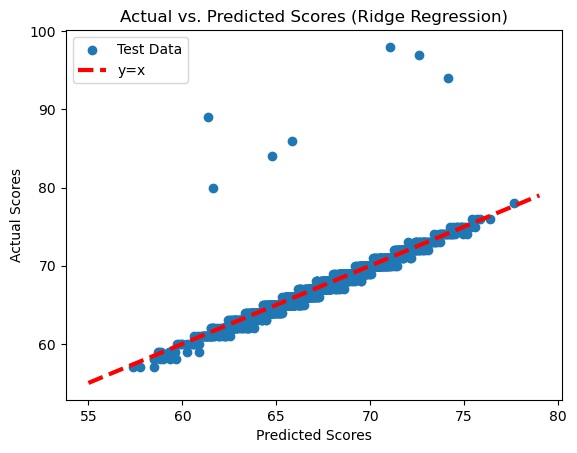

In [20]:
plt.scatter(y_pred_ridge, df_test['Exam_Score'], label='Test Data')
plt.plot(np.arange(55, 80, 1), np.arange(55, 80, 1), linestyle='--', linewidth=3, color='red', label='y=x')
plt.xlabel('Predicted Scores')
plt.ylabel('Actual Scores')
plt.title('Actual vs. Predicted Scores (Ridge Regression)')
plt.legend()
plt.show()